In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cp /content/drive/MyDrive/CSVs/* ./

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.graphics.gofplots import qqplot

In [ ]:
from pandas_datareader import data as pdr
from datetime import datetime

In [466]:
df = pd.read_csv('/content/ITC_stock.csv')

In [467]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-01-01,283.549988,279.799988,282.200012,282.700012,2490548.0,250.739075
1,2019-01-02,283.250000,277.549988,282.250000,280.600006,9934187.0,248.876465
2,2019-01-03,282.450012,277.750000,280.600006,278.850006,6114946.0,247.324326
3,2019-01-04,282.950012,279.149994,279.149994,280.950012,7805148.0,249.186951
4,2019-01-07,285.250000,281.000000,284.299988,281.649994,9757529.0,249.807800


In [468]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
237,2019-12-24,240.199997,238.199997,239.000000,238.750000,7896150.0,215.814545
238,2019-12-26,239.399994,236.350006,238.899994,236.800003,14460325.0,214.051880
239,2019-12-27,238.449997,236.449997,237.500000,236.899994,8712539.0,214.142242
240,2019-12-30,240.899994,237.500000,238.000000,238.199997,13173134.0,215.317352
241,2019-12-31,238.949997,237.399994,238.550003,237.699997,7142051.0,214.865402


#Closing Price Analysis

In [469]:
close = df['Close']
print(close)

0      282.700012
1      280.600006
2      278.850006
3      280.950012
4      281.649994
          ...    
237    238.750000
238    236.800003
239    236.899994
240    238.199997
241    237.699997
Name: Close, Length: 242, dtype: float64


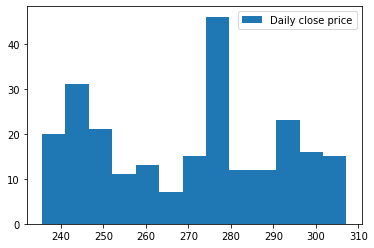

In [470]:
plt.hist(close,bins="rice",label="Daily close price")
plt.legend()
plt.show()

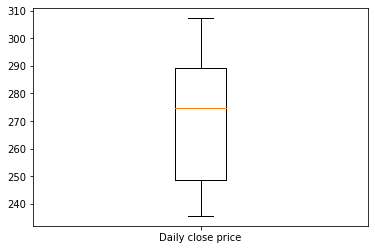

In [471]:
plt.boxplot(close,labels=["Daily close price"])
plt.show()

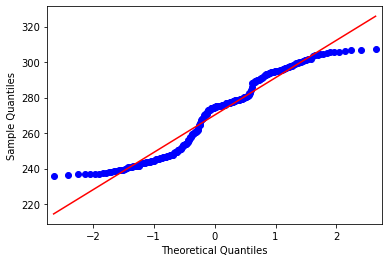

In [472]:
from statsmodels.graphics.gofplots import qqplot
qqplot(close, line='s')
plt.show()

In [473]:
# Summary of stock price descriptive analysis
print("Mean is: ", np.mean(close))
print("Standard deviation is: ", np.std(close))
print("Median is: ", np.quantile(close,0.5))
print("Skewness of the distribution is: ", stats.skew(close))
print("Skewtest of the distribution is: ", stats.skewtest(close))
print("Kurtosis of the distributionn is: ", stats.kurtosis(close))
print("Kurtosis test of the distribution is: ", stats.kurtosistest(close))

Mean is:  270.13243746166387
Standard deviation is:  21.079839202468193
Median is:  274.7250061035156
Skewness of the distribution is:  -0.015001721625256606
Skewtest of the distribution is:  SkewtestResult(statistic=-0.09802390454728983, pvalue=0.9219133116911017)
Kurtosis of the distributionn is:  -1.2545599900515114
Kurtosis test of the distribution is:  KurtosistestResult(statistic=-13.067305779778515, pvalue=5.0627040429065125e-39)


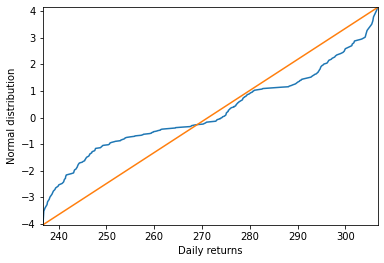

In [474]:
## Checking for normal distribution
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(close,t)
q2 = stats.norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

#**Stock Return Analysis**

In [475]:
## Daily Return
returns = close.pct_change(1).dropna()
returns = returns * 100
print(returns)

1     -0.742839
2     -0.623664
3      0.753095
4      0.249148
5      0.923134
         ...   
237   -0.062785
238   -0.816753
239    0.042226
240    0.548756
241   -0.209908
Name: Close, Length: 241, dtype: float64


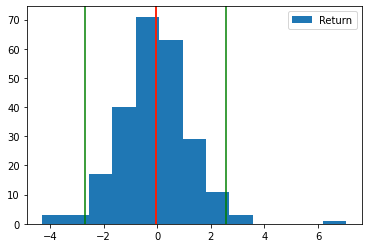

In [476]:
plt.hist(returns, bins="rice", label="Return")
plt.axvline(returns.mean(), color='darkorange')
plt.axvline(returns.median(), color='red')
plt.axvline(returns.mean() - 2*returns.std(), color='green')
plt.axvline(returns.mean() + 2*returns.std(), color='green')

plt.legend()
plt.show()

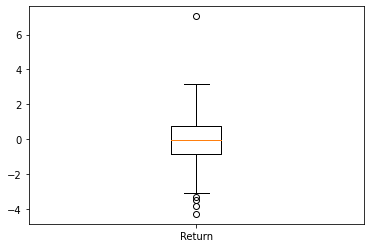

In [477]:
plt.boxplot(returns ,labels=["Return"])
plt.show()

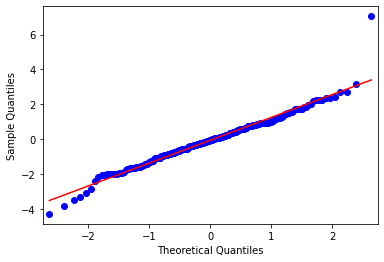

In [478]:
from statsmodels.graphics.gofplots import qqplot
qqplot(returns, line='s')
plt.show()

In [479]:
# Summary of stock price descriptive analysis
print("Mean is: ", np.mean(returns))
print("Standard deviation is: ", np.std(returns))
print("Median is: ", np.quantile(returns,0.5))
print("Skewness of the distribution is: ", stats.skew(returns))
print("Skewtest of the distribution is: ", stats.skewtest(returns))
print("Kurtosis of the distributionn is: ", stats.kurtosis(returns))
print("Kurtosis test of the distribution is: ", stats.kurtosistest(returns))

Mean is:  -0.06334093490607351
Standard deviation is:  1.3110447550456212
Median is:  -0.06278522407555664
Skewness of the distribution is:  0.39846214121795037
Skewtest of the distribution is:  SkewtestResult(statistic=2.51260927129629, pvalue=0.01198419848679624)
Kurtosis of the distributionn is:  3.291157366118382
Kurtosis test of the distribution is:  KurtosistestResult(statistic=4.909651505848799, pvalue=9.123838727868614e-07)


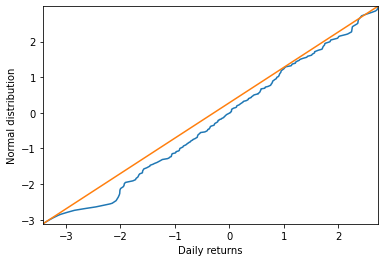

In [480]:
## Checking for normal distribution
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns,t)
q2 = stats.norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()